In [1]:
pip install --upgrade scikit-learn==1.3.1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
dataset = 'Asset.xlsx'
df = pd.read_excel(dataset)

In [3]:
X = df.iloc[:, 1:]
y = df['AssetType']

In [4]:
X.head()

,SerialNo,Manufacturer,ModelNbr
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,0,NaN,O
4,NaN,NaN,FRENGER


In [5]:
y.head()

0    CHILLED BEAMS - PASSIVE
1    CHILLED BEAMS - PASSIVE
2    CHILLED BEAMS - PASSIVE
3    CHILLED BEAMS - PASSIVE
4    CHILLED BEAMS - PASSIVE
Name: AssetType, dtype: object

In [6]:
# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [7]:
X = X_imputed

In [8]:
X

,SerialNo,Manufacturer,ModelNbr
0,TBA,DAIKIN,TBA
1,TBA,DAIKIN,TBA
2,TBA,DAIKIN,TBA
3,0,DAIKIN,O
4,TBA,DAIKIN,FRENGER
...,...,...,...
289048,3163605860,ABB,ACH550
289049,3163605907,ABB,ACH550
289050,3163006120,ABB,ACH550
289051,42237A0264,ABB,ACH580


In [9]:
special_values = [1234,'SERIAL','NO SERIAL','SERIAL FADED', 'UNKOWN','REFER TO PIC','FADED LABEL','N.A.','NOT SHOWN', 'Unknown', 'NA', 'NULL', 'UNKNOWN', 'TBA', 'N/A', 'NOT VISIBLE', '123TEST', 'UNABLE TO LOCATE', 'NO ID', 'NO ACCESS', 'UNKOWN', 'NaN', 'na', 'AS PER PICS']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X_copy = X.copy()

# Replace values using .loc to avoid SettingWithCopyWarning
X_copy.loc[:, 'SerialNo'] = X_copy['SerialNo'].replace(special_values, pd.NA)
X_copy.loc[:, 'Manufacturer'] = X_copy['Manufacturer'].replace(special_values, pd.NA)
X_copy.loc[:, 'ModelNbr'] = X_copy['ModelNbr'].replace(special_values, pd.NA)

# Now X_copy contains the modified DataFrame
X = X_copy

In [10]:
X['SerialNo'] = X['SerialNo'].str.replace(' ', '')

In [11]:
X

,SerialNo,Manufacturer,ModelNbr
0,NaN,DAIKIN,<NA>
1,NaN,DAIKIN,<NA>
2,NaN,DAIKIN,<NA>
3,NaN,DAIKIN,O
4,NaN,DAIKIN,FRENGER
...,...,...,...
289048,NaN,ABB,ACH550
289049,NaN,ABB,ACH550
289050,NaN,ABB,ACH550
289051,42237A0264,ABB,ACH580


In [12]:
import joblib

In [13]:
LE_Asset = LabelEncoder()
LE_SERIAL= LabelEncoder()
LE_Manufact = LabelEncoder()
LE_Model = LabelEncoder()

In [14]:
X['Manufacturer'] = LE_Manufact.fit_transform(X['Manufacturer'].astype(str))
X['ModelNbr'] = LE_Model.fit_transform(X['ModelNbr'].astype(str))
X['SerialNo'] = LE_SERIAL.fit_transform(X['SerialNo'].astype(str))

In [15]:
X

,SerialNo,Manufacturer,ModelNbr
0,27278,286,7364
1,27278,286,7364
2,27278,286,7364
3,61217,286,37748
4,27278,286,25760
...,...,...,...
289048,61217,5,8438
289049,61217,5,8438
289050,61217,5,8438
289051,18157,5,8973


In [16]:
y = LE_Asset.fit_transform(y.astype(str))

In [17]:
# Initial training subset
initial_train_size = 150000
X_train_initial, _, y_train_initial, _ = train_test_split(X, y, train_size=initial_train_size, random_state=42)

In [18]:
# Train the RandomForestClassifier on the initial subset
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=63)
rf_classifier.fit(X_train_initial, y_train_initial)

RandomForestClassifier(n_estimators=10, random_state=63)

In [19]:
chunk_size = 10000
X_test_chunk, _, y_test_chunk, _ = train_test_split(X, y, test_size=chunk_size, random_state=35)
y_pred_encoded = rf_classifier.predict(X_test_chunk)

In [20]:
accuracy = accuracy_score(y_test_chunk, y_pred_encoded)
print(f"Accuracy on the chunk: {accuracy}")

Accuracy on the chunk: 0.6577281018301183


In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

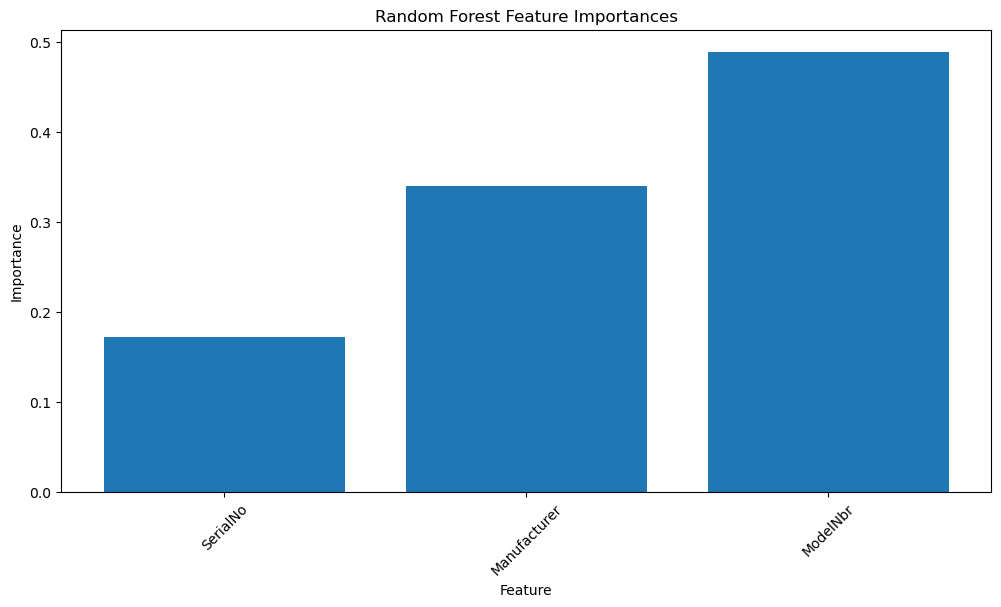

In [24]:
# Get feature importances from the trained random forest
feature_importances = rf_classifier.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(X_train_initial.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45)
plt.show()

IndexError: list index out of range

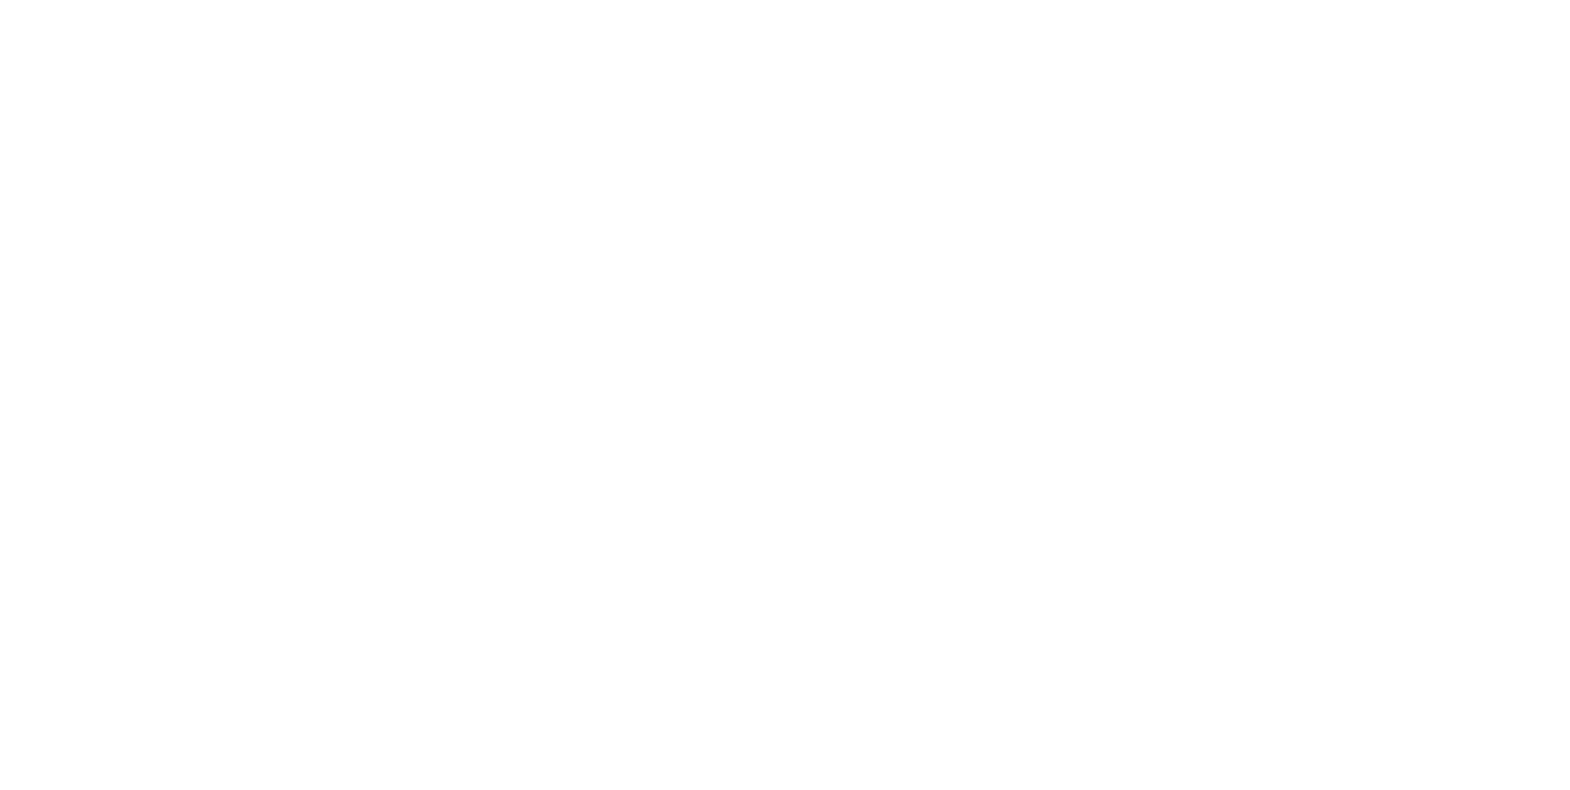

In [26]:
# Choose the index of the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

# Visualize the selected tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[tree_index], filled=True, feature_names=X_train_initial.columns, class_names=["Class 0", "Class 1"])
plt.show()

In [20]:
import joblib

In [21]:
modelName = 'model/rf_final9'
joblib.dump(rf_classifier, modelName)

['model/rf_final9']

In [57]:
joblib.dump(LE_Asset,'encoders/LE_ASSET')

['encoders/LE_ASSET']

In [58]:
joblib.dump(LE_Manufact,'encoders/LE_MANUFACT')

['encoders/LE_MANUFACT']

In [59]:
joblib.dump(LE_Model,'encoders/LE_MODEL')

['encoders/LE_MODEL']

In [60]:
joblib.dump(LE_SERIAL,'encoders/LE_SERIAL')

['encoders/LE_SERIAL']